In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Задача

- [ ] Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

# Работа с датасетом

In [2]:
df = pd.read_csv('personality_datasert.csv')
df.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert


Будем решать задачу класассификации на датасете "Extrovert vs. Introvert Behavior Data" https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/data?select=personality_datasert.csv <br>
Узнаем, является человек интровертом или экстравертом на основе 7 признаков: <br>
* Time_spent_Alone - проводимые часы в одиночестве в день на постоянной основе (0-11 часов)
* Stage_fear - наличие боязни сцены (Yes/No)
* Social_event_attendance - насколько часто посещает общественные мероприятия (0-10, где 0 - никогда, 10 - очень часто)
* Going_outside - насколько часто выходит на улицу (дней в неделю, от 0 до 7)
* Drained_after_socializing - ощущение опустошенности после общения (Yes/No)
* Friends_circle_size - количество близких друзей (0-15 штук)
* Post_frequency - частота публикаций в социальных сетях (0-10, 0 - редко, 10 - часто)
* **Personality** - тип личности (Extrovert/Introvert) - целевая

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Есть данные 2900 человек <br>
Видим, что пропусков нет, однако изменим типы некоторых признаков

In [4]:
for i in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Time_spent_Alone           2900 non-null   float64 
 1   Stage_fear                 2900 non-null   category
 2   Social_event_attendance    2900 non-null   float64 
 3   Going_outside              2900 non-null   float64 
 4   Drained_after_socializing  2900 non-null   category
 5   Friends_circle_size        2900 non-null   float64 
 6   Post_frequency             2900 non-null   float64 
 7   Personality                2900 non-null   category
dtypes: category(3), float64(5)
memory usage: 122.3 KB


# EDA

* Посмотрим на распределение каждого признака отдельно

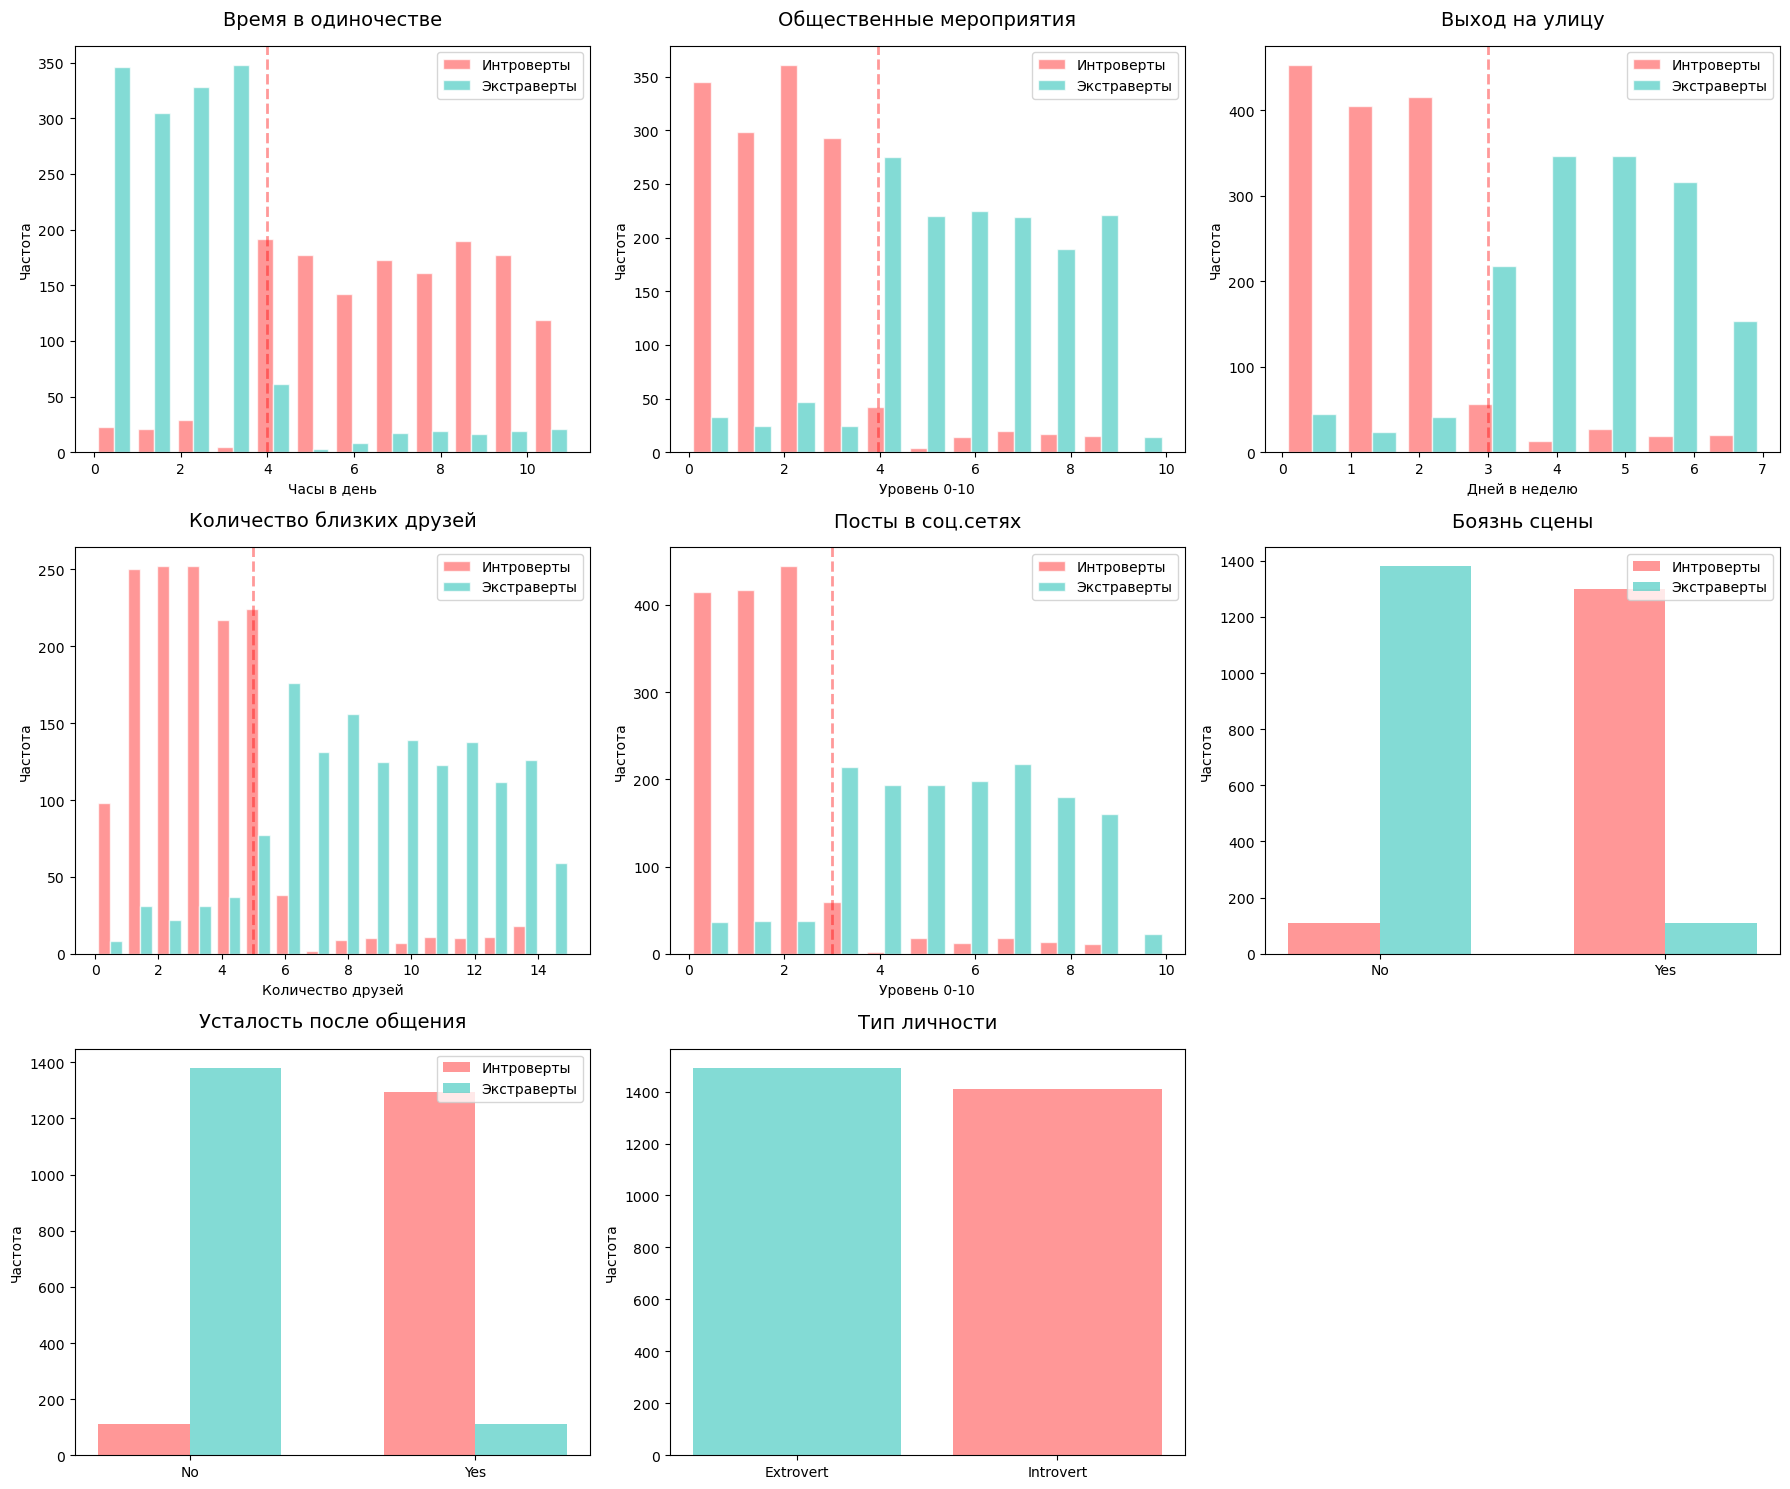

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

ax = axes[0, 0]
intro = df[df['Personality'] == 'Introvert']['Time_spent_Alone']
extra = df[df['Personality'] == 'Extrovert']['Time_spent_Alone']

ax.hist([intro, extra], bins=12, color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='white', label=['Интроверты', 'Экстраверты'])
ax.axvline(df['Time_spent_Alone'].median(), color='red', linestyle='--', linewidth=2, alpha=0.4)
ax.set_title('Время в одиночестве', fontsize=14, pad=15)
ax.set_xlabel('Часы в день')
ax.set_ylabel('Частота')
ax.legend()

ax = axes[0, 1]
intro = df[df['Personality'] == 'Introvert']['Social_event_attendance']
extra = df[df['Personality'] == 'Extrovert']['Social_event_attendance']
ax.hist([intro, extra], bins=11, color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='white', label=['Интроверты', 'Экстраверты'])
ax.axvline(df['Social_event_attendance'].median(), color='red', linestyle='--', linewidth=2, alpha=0.4)
ax.set_title('Общественные мероприятия', fontsize=14, pad=15)
ax.set_xlabel('Уровень 0-10')
ax.set_ylabel('Частота')
ax.legend()

ax = axes[0, 2]
intro = df[df['Personality'] == 'Introvert']['Going_outside']
extra = df[df['Personality'] == 'Extrovert']['Going_outside']
ax.hist([intro, extra], bins=8, color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='white', label=['Интроверты', 'Экстраверты'])
ax.axvline(df['Going_outside'].median(), color='red', linestyle='--', linewidth=2, alpha=0.4)
ax.set_title('Выход на улицу', fontsize=14, pad=15)
ax.set_xlabel('Дней в неделю')
ax.set_ylabel('Частота')
ax.legend()

ax = axes[1, 0]
intro = df[df['Personality'] == 'Introvert']['Friends_circle_size']
extra = df[df['Personality'] == 'Extrovert']['Friends_circle_size']
ax.hist([intro, extra], bins=16, color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='white', label=['Интроверты', 'Экстраверты'])
ax.axvline(df['Friends_circle_size'].median(), color='red', linestyle='--', linewidth=2, alpha=0.4)
ax.set_title('Количество близких друзей', fontsize=14, pad=15)
ax.set_xlabel('Количество друзей')
ax.set_ylabel('Частота')
ax.legend()

ax = axes[1, 1]
intro = df[df['Personality'] == 'Introvert']['Post_frequency']
extra = df[df['Personality'] == 'Extrovert']['Post_frequency']
ax.hist([intro, extra], bins=11, color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='white', label=['Интроверты', 'Экстраверты'])
ax.axvline(df['Post_frequency'].median(), color='red', linestyle='--', linewidth=2, alpha=0.4)
ax.set_title('Посты в соц.сетях', fontsize=14, pad=15)
ax.set_xlabel('Уровень 0-10')
ax.set_ylabel('Частота')
ax.legend()

ax = axes[1, 2]
intro = df[df['Personality'] == 'Introvert']['Stage_fear'].value_counts().sort_index()
extra = df[df['Personality'] == 'Extrovert']['Stage_fear'].value_counts().sort_index()
ax.bar(np.arange(len(intro)) - 0.16, intro.values, 0.32, color='#FF6B6B', alpha=0.7, label='Интроверты')
ax.bar(np.arange(len(intro)) + 0.16, extra.values, 0.32, color='#4ECDC4', alpha=0.7, label='Экстраверты')
ax.set_xticks(np.arange(len(intro)))
ax.set_xticklabels(intro.index)
ax.set_title('Боязнь сцены', fontsize=14, pad=15)
ax.set_ylabel('Частота')
ax.legend()

ax = axes[2, 0]
intro = df[df['Personality'] == 'Introvert']['Drained_after_socializing'].value_counts().sort_index()
extra = df[df['Personality'] == 'Extrovert']['Drained_after_socializing'].value_counts().sort_index()
ax.bar(np.arange(len(intro)) - 0.16, intro.values, 0.32, color='#FF6B6B', alpha=0.7, label='Интроверты')
ax.bar(np.arange(len(intro)) + 0.16, extra.values, 0.32, color='#4ECDC4', alpha=0.7, label='Экстраверты')
ax.set_xticks(np.arange(len(intro)))
ax.set_xticklabels(intro.index)
ax.set_title('Усталость после общения', fontsize=14, pad=15)
ax.set_ylabel('Частота')
ax.legend()

ax = axes[2, 1]
person = df['Personality'].value_counts().sort_index()
ax.bar(range(len(person)), person.values, color=['#4ECDC4', '#FF6B6B'], alpha=0.7, tick_label=person.index)
ax.set_title('Тип личности', fontsize=14, pad=15)
ax.set_ylabel('Частота')

fig.delaxes(axes[2, 2])
plt.tight_layout()

plt.show()

Везде, кроме категориальных признаков, отметим медианы <br>
Сделаем некоторые выводы (на основе доп. подсчетов): <br>
* Время в одиночестве: 94.5% интровертов 4 и более часов проводят в одиночестве, 89.0% экстравертов проводят менее 4 часов в одиночестве
* Общественные мероприятия: 92.1% интровертов менее чем 4 пунктами оценивают посещение общепственных мероприятий, 91.4% экстравертов оценивают же 4 и более пунктами
* Выход на улицу: 90.3% интровертов выходят на улицу 0-2 дней в неделю, 92.6% экстравертов выходят 3+ дней в неделю
* Близкие друзья: 91.8% интровертов имеют 0-5 друзей, 87.2% экстравертов имеют 6+ друзей
* Посты в соцсетях: 90.6% интровертов оценивают на 0-2, 92.6% экстравертов оценивают на 3+
* Боязнь сцены: 92.2% интровертов ответили Да, 92.6% экстравертов ответили Нет
* Усталость после общения: 92% интроветов ответили Да, 92.6% экстравертов ответили Нет

Видно, что есть четкие границы для каждого типа, а распределения категориальных Stage_fear и Drained_after_socializing 
очень похожи на распределение типов

# Классификация

* Закодируем категориальные признаки, где Yes - это 1, No - это 0, а также целевой столбец (Introvert - 0, Extrovert - 1)

In [9]:
X = df.drop('Personality', axis=1).copy()
X['Stage_fear'] = X['Stage_fear'].map({'No': 0, 'Yes': 1})
X['Drained_after_socializing'] = X['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

y = df['Personality'].map({'Introvert':0, 'Extrovert':1})
X.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0


* Разделим данные на тестовую и тренировочную выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Также отмасштабируем все признаки

In [11]:
X_train_n = StandardScaler().fit_transform(X_train)
X_test_n = StandardScaler().fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_n, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_n, columns=X_test.columns)
X_test_scaled.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,-1.306012,-0.986301,0.359830,0.943498,-0.97952,-0.075018,0.815785
1,-0.445089,-0.986301,1.055897,0.030689,-0.97952,0.402325,0.815785
2,-0.732064,-0.986301,1.055897,1.399903,-0.97952,-0.075018,1.502032


* ### LogisticRegression

Подберем нужные параметры для лог регрессии <br>
Рассмотрим разные силы регуляризации и алгоритмы оптимизации (cv = 5, поэтому используется кросс-валидация)

In [12]:
param = { 'C': np.logspace(-3, 3, 15), 'solver': ['liblinear', 'lbfgs']}

search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param, cv=5, scoring='f1', n_jobs=-1)
search.fit(X_train_scaled, y_train)
best = search.best_estimator_
search.best_estimator_

LogisticRegression(C=0.001, max_iter=1000, random_state=42, solver='liblinear')

Получили лучшую модель, теперь посмотрим на тестовые данные, посчитаем F1-score  и отобразим матрицу ошибок 

In [13]:
y_pred_logreg = best.predict(X_test_scaled)
log_test_f1 = f1_score(y_test, y_pred_logreg)
log_test_f1

0.9251700680272109

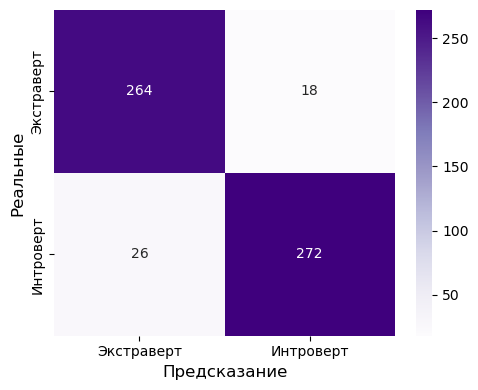

In [14]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Экстраверт', 'Интроверт'], yticklabels=['Экстраверт', 'Интроверт'],)

plt.ylabel('Реальные', fontsize=12)
plt.xlabel('Предсказание', fontsize=12)

plt.tight_layout()
plt.show()

Итак, **F1-score равен 0.925** <br>
18 экстравертов, ошибочно принятых за интровертов <br>
26 интровертов, ошибочно принятых за экстравертов<br>
Объем тестовых данных - 580 человек <br><br>
Посмотрим на другие модели и сравним результаты


* ### SVC

Сделаем то же самое с методом опорных векторов, подбирая разные параметры

In [32]:
param = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.1]}
svc_search = GridSearchCV(SVC(random_state=42), param, cv=5, scoring='f1', n_jobs=-1)
svc_search.fit(X_train_scaled, y_train)
best_svm = svc_search.best_estimator_
best_svm

SVC(C=0.01, random_state=42)

Нашли лучшие параметры (остальные - по умолчанию)

In [33]:
y_pred_svm = best_svm.predict(X_test_scaled)
svm_test_f1 = f1_score(y_test, y_pred_svm)
svm_test_f1

0.9251700680272109

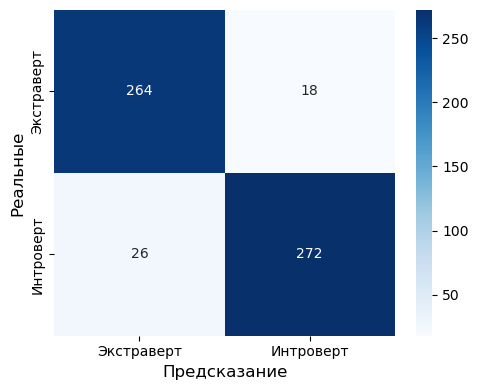

In [34]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Экстраверт', 'Интроверт'], yticklabels=['Экстраверт', 'Интроверт'],)

plt.ylabel('Реальные', fontsize=12)
plt.xlabel('Предсказание', fontsize=12)

plt.tight_layout()
plt.show()

**F1-score** так же равен 0.925, а данные матрицы ошибок идентичны

* ### K-Nearest Neighbors

In [37]:
param = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
knn_search = GridSearchCV(KNeighborsClassifier(), param, cv=5, scoring='f1', n_jobs=-1)
knn_search.fit(X_train_scaled, y_train) 
best_knn = knn_search.best_estimator_
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [39]:
y_pred_knn = best_knn.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_f1

0.924914675767918

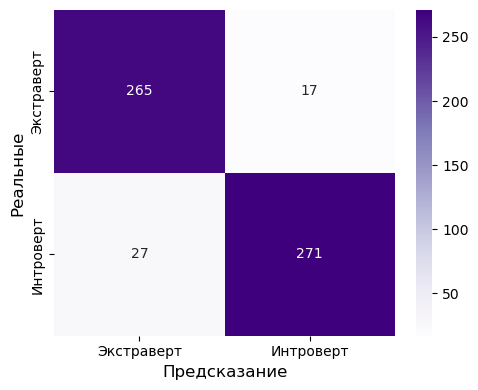

In [42]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Экстраверт', 'Интроверт'], yticklabels=['Экстраверт', 'Интроверт'],)

plt.ylabel('Реальные', fontsize=12)
plt.xlabel('Предсказание', fontsize=12)

plt.tight_layout()
plt.show()

Итак, **F1-score** немного меньше методом K-ближайших соседей, **0.9249** <br>
17 экстравертов, ошибочно принятых за интровертов <br>
27 интровертов, ошибочно принятых за экстравертов<br>

* ### Decision Tree

In [44]:
param = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
tree_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param, cv=5, scoring='f1', n_jobs=-1)
tree_search.fit(X_train, y_train)  
best_tree = tree_search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
y_pred_tree = best_tree.predict(X_test)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_f1

0.9251700680272109

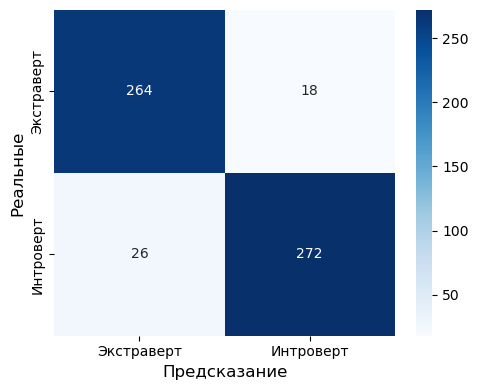

In [47]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Экстраверт', 'Интроверт'], yticklabels=['Экстраверт', 'Интроверт'],)

plt.ylabel('Реальные', fontsize=12)
plt.xlabel('Предсказание', fontsize=12)

plt.tight_layout()
plt.show()

Итак, **F1-score равен 0.925**, что, предполагаемо, потолок точности, который можнно получить <br>

### Вывод

Для наших данных подходит LogisticRegression, Decision Tree, SVC c **F1-score равным 0.925**, но из-за простоты
рекомендуется **LogisticRegression** <br>
Данные очень хорошо подходят для классификации (как минимум, признаки Stage_fear и Drained_after_socializing практически точно повторяют
распределение интровертов и экстравертов), поэтому рассмотренные методы дают результат выше 92% <br>
